<a href="https://colab.research.google.com/github/kunz3001/INSE-6220/blob/main/Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification). For this project we are going to learn about the Binary Classification.

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import requests
import csv
import io
from io import StringIO
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


# **Dataset**

The examined group comprised types of breast cancer can be divided into the categories of Melignant(0) and Benign(1). A fine needle Aspirate(FNA) has been used to find the digitized image of the breast mass which was further used to compute the values for the feature mass. These features may provide the information about the characteristics of nuclei.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, eight geometric parameters of wheat kernels were measured:
1. Diagnosis (0 = Malignant, 1 = Benign)
2. Radius,
3. Texture,
4. Perimeter,
5. Area,
6. Smoothness(Variation in radius lengths)
7. Compactness (perimeter^2 / area - 1.0),
8. Concavity (severity of concave portions of the contour)
9. Concave points (number of concave portions of the contour)
The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 298 benign, 112 malignant

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
#read cvs file into dataframe
df=pd.read_csv('https://raw.githubusercontent.com/kunz3001/INSE-6220/main/BreastCancer.csv')
df.head(30)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           0       17.990         10.38          122.80     1001.0   
1           0       20.570         17.77          132.90     1326.0   
2           0       19.690         21.25          130.00     1203.0   
3           0       11.420         20.38           77.58      386.1   
4           0       20.290         14.34          135.10     1297.0   
5           0       12.450         15.70           82.57      477.1   
6           0       18.250         19.98          119.60     1040.0   
7           0       13.710         20.83           90.20      577.9   
8           0       13.000         21.82           87.50      519.8   
9           0       12.460         24.04           83.97      475.9   
10          0       16.020         23.24          102.70      797.8   
11          0       15.780         17.89          103.60      781.0   
12          0       19.170         24.80          132.40     1123.0   
13          0       15.850         23.95          103.70      782.7   
14          0       13.730         22.61           93.60      578.3   
15          0       14.540         27.54           96.73      658.8   
16          0       14.680         20.13           94.74      684.5   
17          0       16.130         20.68          108.10      798.8   
18          0       19.810         22.15          130.00     1260.0   
19          1       13.540         14.36           87.46      566.3   
20          1       13.080         15.71           85.63      520.0   
21          1        9.504         12.44           60.34      273.9   
22          0       15.340         14.26          102.50      704.4   
23          0       21.160         23.04          137.20     1404.0   
24          0       16.650         21.38          110.00      904.6   
25          0       17.140         16.40          116.00      912.7   
26          0       14.580         21.53           97.41      644.8   
27          0       18.610         20.25          122.10     1094.0   
28          0       15.300         25.27          102.40      732.4   
29          0       17.570         15.05          115.00      955.1   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  
0           0.11840           0.27760         0.30010              0.14710  
1           0.08474           0.07864         0.08690              0.07017  
2           0.10960           0.15990         0.19740              0.12790  
3           0.14250           0.28390         0.24140              0.10520  
4           0.10030           0.13280         0.19800              0.10430  
5           0.12780           0.17000         0.15780              0.08089  
6           0.09463           0.10900         0.11270              0.07400  
7           0.11890           0.16450         0.09366              0.05985  
8           0.12730           0.19320         0.18590              0.09353  
9           0.11860           0.23960         0.22730              0.08543  
10          0.08206           0.06669         0.03299              0.03323  
11          0.09710           0.12920         0.09954              0.06606  
12          0.09740           0.24580         0.20650              0.11180  
13          0.08401           0.10020         0.09938              0.05364  
14          0.11310           0.22930         0.21280              0.08025  
15          0.11390           0.15950         0.16390              0.07364  
16          0.09867           0.07200         0.07395              0.05259  
17          0.11700           0.20220         0.17220              0.10280  
18          0.09831           0.10270         0.14790              0.09498  
19          0.09779           0.08129         0.06664              0.04781  
20          0.10750           0.12700         0.04568              0.03110  
21          0.10240           0.06492         0.02956              0.02076  
22          0.10730           0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            409 non-null    int64  
 1   radius_mean          409 non-null    float64
 2   texture_mean         409 non-null    float64
 3   perimeter_mean       409 non-null    float64
 4   area_mean            409 non-null    float64
 5   smoothness_mean      409 non-null    float64
 6   compactness_mean     409 non-null    float64
 7   concavity_mean       409 non-null    float64
 8   concave points_mean  409 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 28.9 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

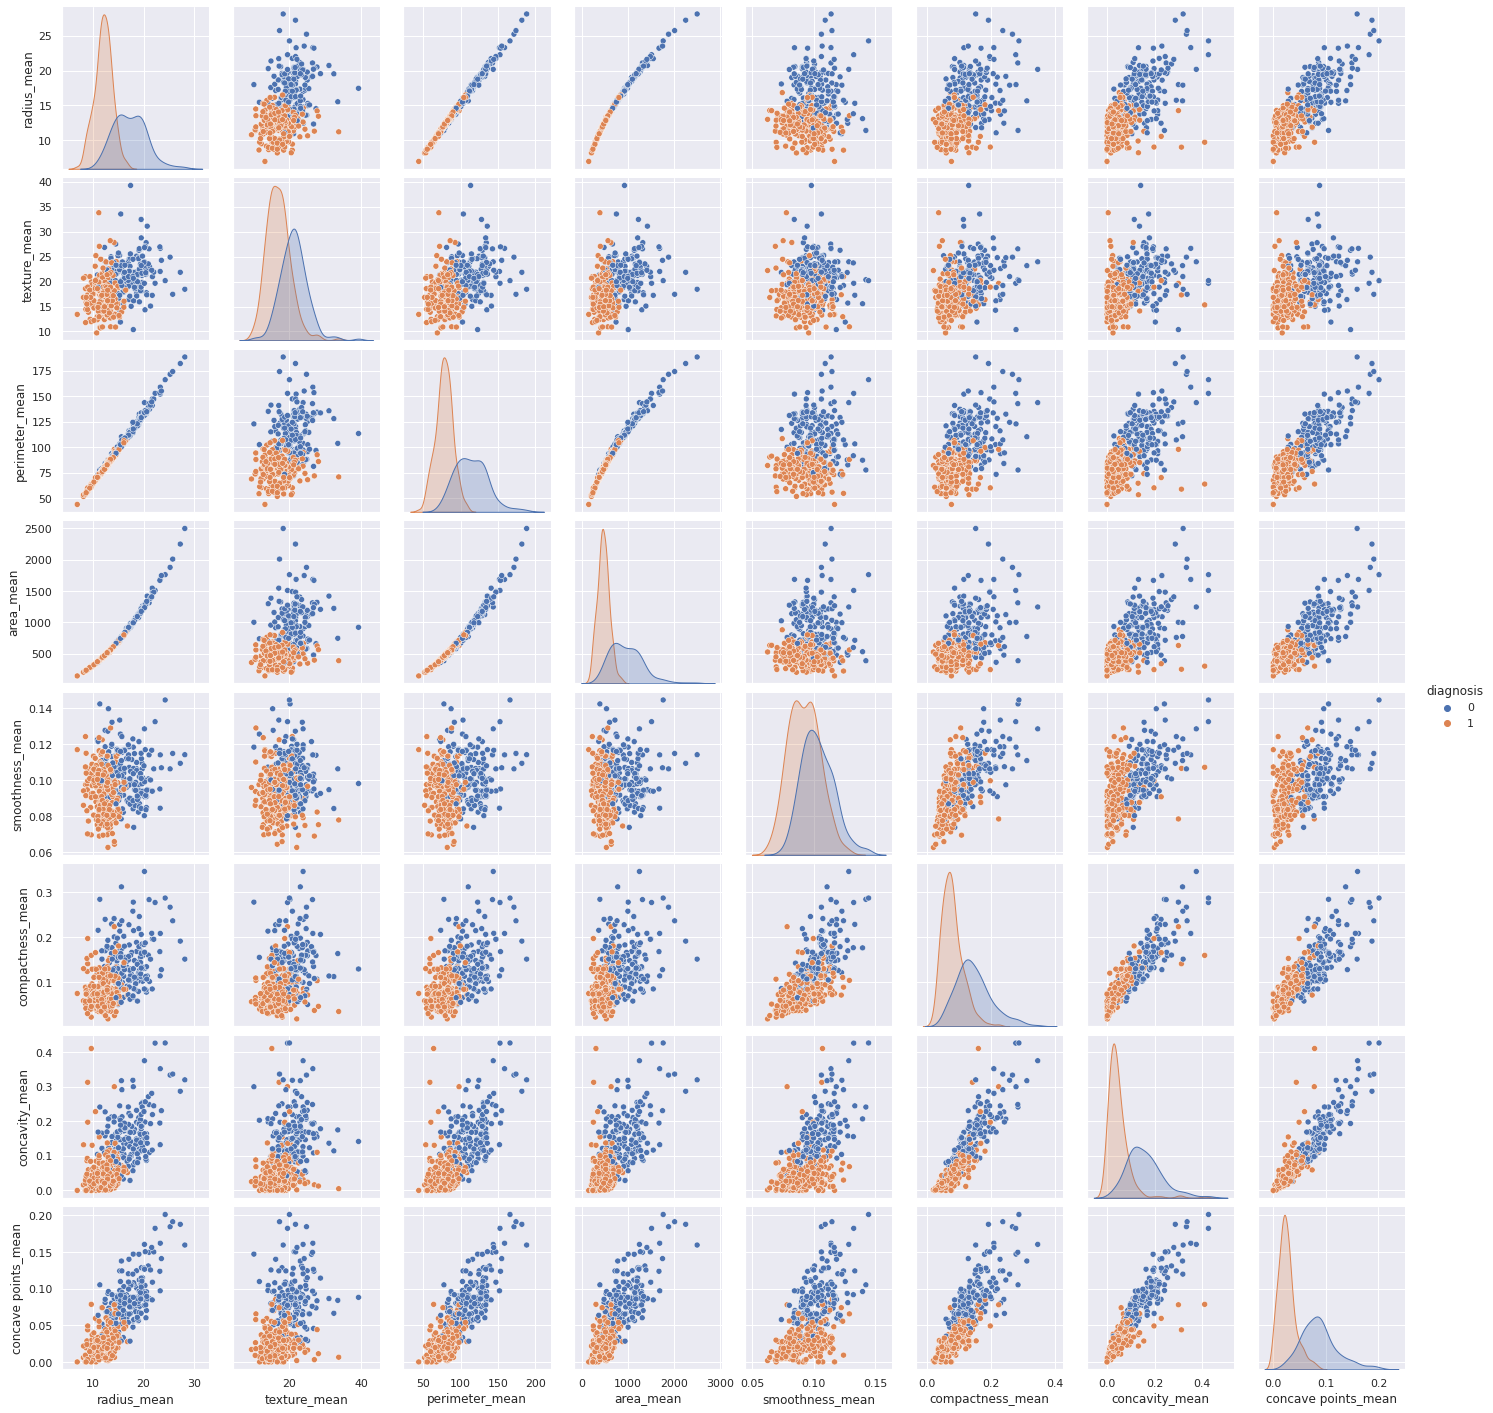

In [ ]:
sns.pairplot(df, hue='diagnosis')
plt.show()

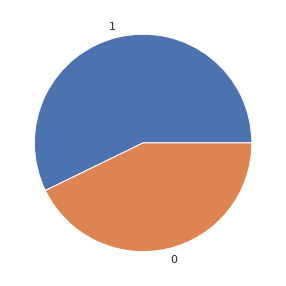

In [ ]:
y =df['diagnosis']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['diagnosis'])
X.head(30)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.990         10.38          122.80     1001.0          0.11840   
1        20.570         17.77          132.90     1326.0          0.08474   
2        19.690         21.25          130.00     1203.0          0.10960   
3        11.420         20.38           77.58      386.1          0.14250   
4        20.290         14.34          135.10     1297.0          0.10030   
5        12.450         15.70           82.57      477.1          0.12780   
6        18.250         19.98          119.60     1040.0          0.09463   
7        13.710         20.83           90.20      577.9          0.11890   
8        13.000         21.82           87.50      519.8          0.12730   
9        12.460         24.04           83.97      475.9          0.11860   
10       16.020         23.24          102.70      797.8          0.08206   
11       15.780         17.89          103.60      781.0          0.09710   
12       19.170         24.80          132.40     1123.0          0.09740   
13       15.850         23.95          103.70      782.7          0.08401   
14       13.730         22.61           93.60      578.3          0.11310   
15       14.540         27.54           96.73      658.8          0.11390   
16       14.680         20.13           94.74      684.5          0.09867   
17       16.130         20.68          108.10      798.8          0.11700   
18       19.810         22.15          130.00     1260.0          0.09831   
19       13.540         14.36           87.46      566.3          0.09779   
20       13.080         15.71           85.63      520.0          0.10750   
21        9.504         12.44           60.34      273.9          0.10240   
22       15.340         14.26          102.50      704.4          0.10730   
23       21.160         23.04          137.20     1404.0          0.09428   
24       16.650         21.38          110.00      904.6          0.11210   
25       17.140         16.40          116.00      912.7          0.11860   
26       14.580         21.53           97.41      644.8          0.10540   
27       18.610         20.25          122.10     1094.0          0.09440   
28       15.300         25.27          102.40      732.4          0.10820   
29       17.570         15.05          115.00      955.1          0.09847   

    compactness_mean  concavity_mean  concave points_mean  
0            0.27760         0.30010              0.14710  
1            0.07864         0.08690              0.07017  
2            0.15990         0.19740              0.12790  
3            0.28390         0.24140              0.10520  
4            0.13280         0.19800              0.10430  
5            0.17000         0.15780              0.08089  
6            0.10900         0.11270              0.07400  
7            0.16450         0.09366              0.05985  
8            0.19320         0.18590              0.09353  
9            0.23960         0.22730              0.08543  
10           0.06669         0.03299              0.03323  
11           0.12920         0.09954              0.06606  
12           0.24580         0.20650              0.11180  
13           0.10020         0.09938              0.05364  
14           0.22930         0.21280              0.08025  
15           0.15950         0.16390              0.07364  
16           0.07200         0.07395              0.05259  
17           0.20220         0.17220              0.10280  
18           0.10270         0.14790              0.09498  
19           0.08129         0.06664              0.04781  
20           0.12700         0.04568              0.03110  
21           0.06492         0.02956              0.02076  
22           0.21350         0.20770              0.09756  
23           0.10220         0.10970              0.08632  
24           0.14570         0.15250              0.09170  
25           0.22760         0.22290              0.1401

In [ ]:
X.describe().transpose()

count        mean         std        min        25%  \
radius_mean          409.0   14.314154    3.558136    6.98100   11.81000   
texture_mean         409.0   18.919242    4.111623    9.71000   15.90000   
perimeter_mean       409.0   93.276015   24.528994   43.79000   75.71000   
area_mean            409.0  672.132029  354.978094  143.50000  431.10000   
smoothness_mean      409.0    0.096867    0.013940    0.06251    0.08682   
compactness_mean     409.0    0.106674    0.055048    0.01938    0.06636   
concavity_mean       409.0    0.093848    0.082330    0.00000    0.02995   
concave points_mean  409.0    0.051651    0.039879    0.00000    0.02037   

                           50%        75%        max  
radius_mean           13.48000   16.24000    28.1100  
texture_mean          18.60000   21.54000    39.2800  
perimeter_mean        87.16000  107.50000   188.5000  
area_mean            561.00000  813.70000  2499.0000  
smoothness_mean        0.09686    0.10610     0.1447  
compactness_mean       0.09509    0.13250     0.3454  
concavity_mean         0.06839    0.13740     0.4268  
concave points_mean    0.03738    0.07944     0.2012

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.034347     -2.079398        1.205110   0.927580         1.546582   
1     1.760334     -0.279853        1.617372   1.844251        -0.871014   
2     1.512711      0.567565        1.499000   1.497327         0.914530   
3    -0.814387      0.355710       -0.640680  -0.806761         3.277540   
4     1.681545     -1.115095        1.707172   1.762456         0.246567   
5    -0.524555     -0.783920       -0.436998  -0.550093         2.221727   
6     1.107509      0.258306        1.074493   1.037581        -0.160675   
7    -0.170003      0.465290       -0.125557  -0.265784         1.582494   
8    -0.369790      0.706366       -0.235765  -0.429656         2.185815   
9    -0.521741      1.246960       -0.379853  -0.553477         1.560946   

   compactness_mean  concavity_mean  concave points_mean  
0          3.108833        2.508256             2.396410  
1         -0.509887       -0.084491             0.464951  
2          0.968085        1.259311             1.914361  
3          3.223418        1.794400             1.344439  
4          0.475185        1.266608             1.321843  
5          1.151785        0.777731             0.734095  
6          0.042306        0.229266             0.561109  
7          1.051750       -0.002282             0.205849  
8          1.573751        1.119458             1.051443  
9          2.417682        1.622928             0.848079

In [ ]:
X.describe().transpose()

count          mean       std       min       25%  \
radius_mean          409.0 -2.996788e-16  1.001225 -2.063478 -0.704645   
texture_mean         409.0  1.129224e-16  1.001225 -2.242550 -0.735218   
perimeter_mean       409.0 -1.129224e-16  1.001225 -2.019921 -0.717010   
area_mean            409.0  1.216088e-16  1.001225 -1.491020 -0.679837   
smoothness_mean      409.0  5.211805e-16  1.001225 -2.467662 -0.721620   
compactness_mean     409.0  1.042361e-16  1.001225 -1.587718 -0.733237   
concavity_mean       409.0 -4.343171e-17  1.001225 -1.141290 -0.777065   
concave points_mean  409.0  8.686342e-18  1.001225 -1.296787 -0.785363   

                          50%       75%       max  
radius_mean         -0.234723  0.541914  3.882016  
texture_mean        -0.077739  0.638183  4.958065  
perimeter_mean      -0.249644  0.580595  3.886854  
area_mean           -0.313451  0.399296  5.152728  
smoothness_mean     -0.000508  0.663146  3.435553  
compactness_mean    -0.210691  0.469729  4.341991  
concavity_mean      -0.309593  0.529645  4.049068  
concave points_mean -0.358298  0.697690  3.754683

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

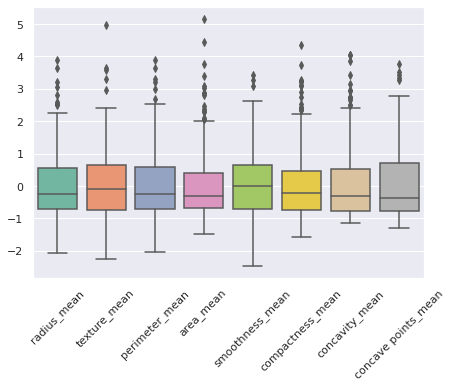

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

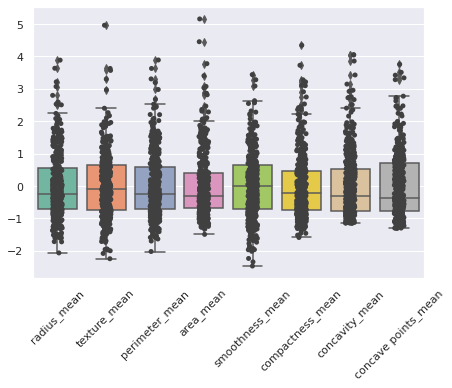

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

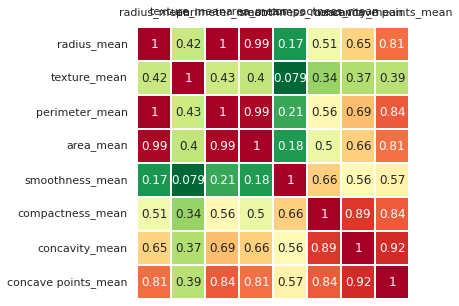

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

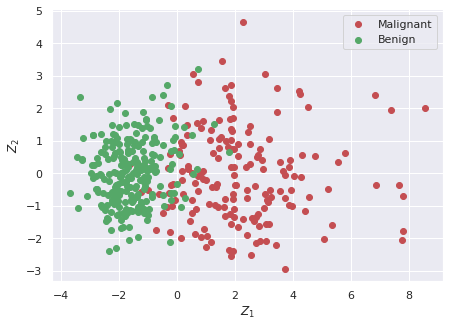

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Malignant)->0,  2(Benign)->1
idx_Malignant = np.where(y == 0)
idx_Benign = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

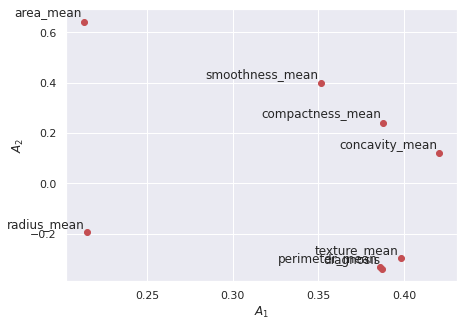

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(A)
print(eigen_vals)
print(eigen_vecs)

[ 1.        +0.j          0.46609608+0.88473411j  0.46609608-0.88473411j
  0.19732671+0.98033778j  0.19732671-0.98033778j -0.74337903+0.66887041j
 -0.74337903-0.66887041j -1.        +0.j        ]
[[ 3.14263444e-01+0.j          5.10718803e-01+0.j
   5.10718803e-01-0.j          1.54115500e-01+0.38876538j
   1.54115500e-01-0.38876538j  1.07004255e-01-0.02022486j
   1.07004255e-01+0.02022486j  7.79292945e-02+0.j        ]
 [-1.37264967e-01+0.j          2.08725893e-01-0.30723757j
   2.08725893e-01+0.30723757j -1.01150583e-01-0.29927893j
  -1.01150583e-01+0.29927893j  4.91932125e-01+0.j
   4.91932125e-01-0.j         -1.47113591e-01+0.j        ]
 [-1.54611713e-01+0.j          2.82660662e-01-0.02117726j
   2.82660662e-01+0.02117726j  2.83019462e-01-0.32135772j
   2.83019462e-01+0.32135772j -2.91925925e-01+0.37297485j
  -2.91925925e-01-0.37297485j  7.70903502e-04+0.j        ]
 [ 4.87617625e-01+0.j         -2.17025583e-01-0.10340882j
  -2.17025583e-01+0.10340882j  2.73248462e-01+0.03389934j
   2.

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


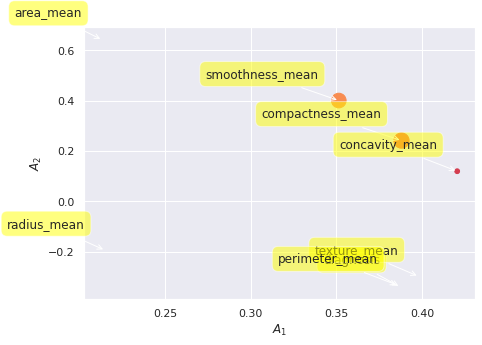

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

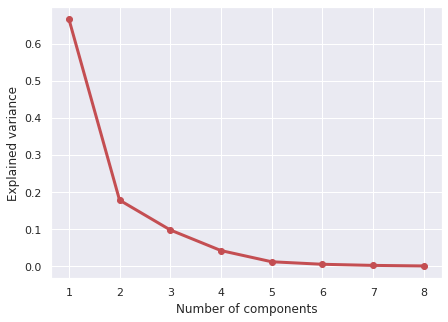

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

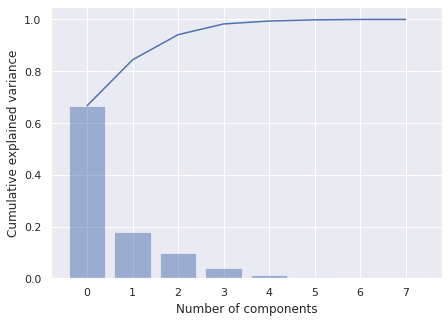

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (66.7%)',
 '1': 'PC 2 (17.8%)',
 '2': 'PC 3 (9.7%)',
 '3': 'PC 4 (4.1%)',
 '4': 'PC 5 (1.1%)',
 '5': 'PC 6 (0.5%)',
 '6': 'PC 7 (0.2%)',
 '7': 'PC 8 (0.0%)'}

**Biplot**

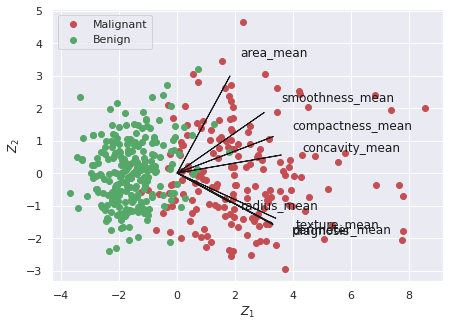

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.legend(loc='upper left')

**Control Charts**

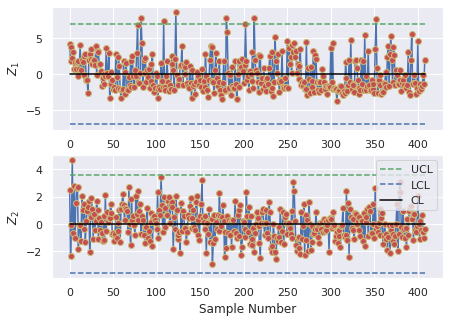

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

**Out of Control Points**

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[ 82]
 [108]
 [122]
 [180]
 [212]
 [352]]
[]
[[3]]


##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=9ac68c0fa16cdcff58dae2f5f20d6f22be2f73d1cf228e4c61551b04d81374b6
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=d508636321a2191ea899125c23a52629591dbb01dc6edd14b85e69cd03da5b1e
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4
0    4.194494  2.512072 -2.400306  1.395508
1    1.774798 -2.372889 -1.240555 -0.313354
2    3.711368 -0.066243 -0.313914 -0.288419
3    2.288438  4.658271  0.864136  0.208672
4    3.038035 -0.642480 -1.992354  0.126441
..        ...       ...       ...       ...
404 -2.102878 -0.462871 -0.647285 -0.013242
405 -1.681808  0.634797  0.370601 -0.312309
406 -0.113721 -0.616786 -1.195943 -0.328982
407 -1.355348 -1.048329  0.857105  0.778252
408  2.003021 -0.364777 -0.154054 -0.448495

[409 rows x 4 columns]

In [ ]:
print(out['topfeat'])

    PC              feature   loading  type
0  PC1  concave points_mean  0.420496  best
1  PC2      smoothness_mean  0.642195  best
2  PC3         texture_mean  0.943666  best
3  PC4      smoothness_mean -0.714406  best
4  PC1          radius_mean  0.387225  weak
5  PC1       perimeter_mean  0.397970  weak
6  PC1            area_mean  0.386056  weak
7  PC4     compactness_mean  0.429460  weak
8  PC4       concavity_mean  0.466248  weak


**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [409] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [409] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0329bc8a30>)

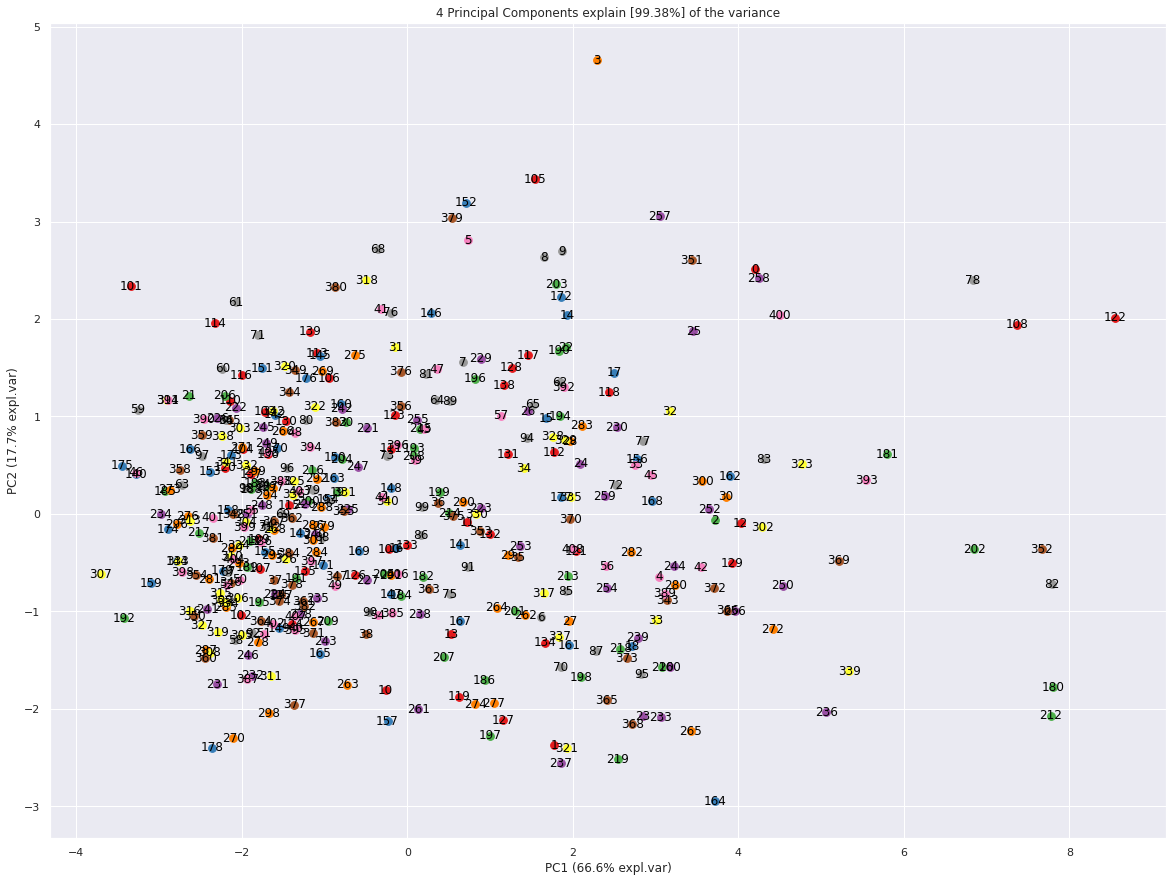

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

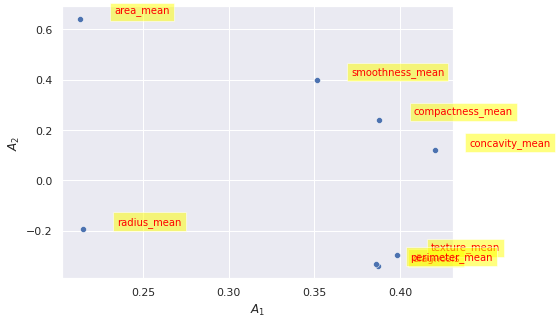

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

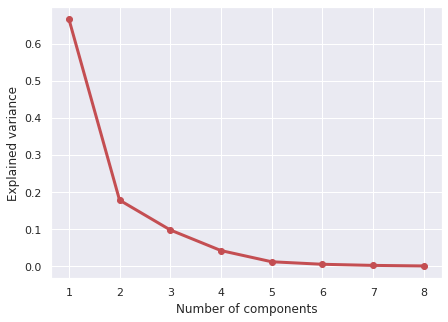

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

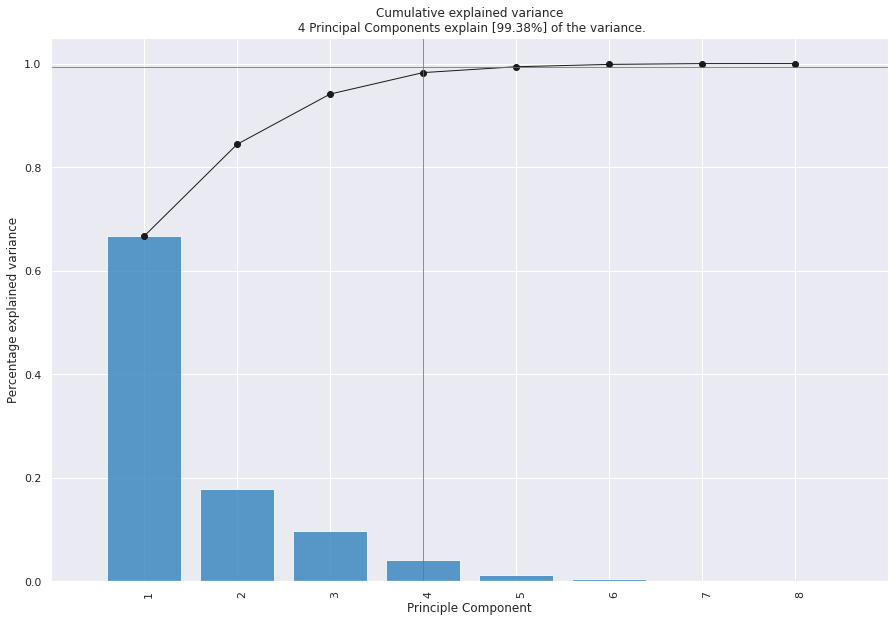

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [409] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [409] unique colors! Available unique colors: [9].


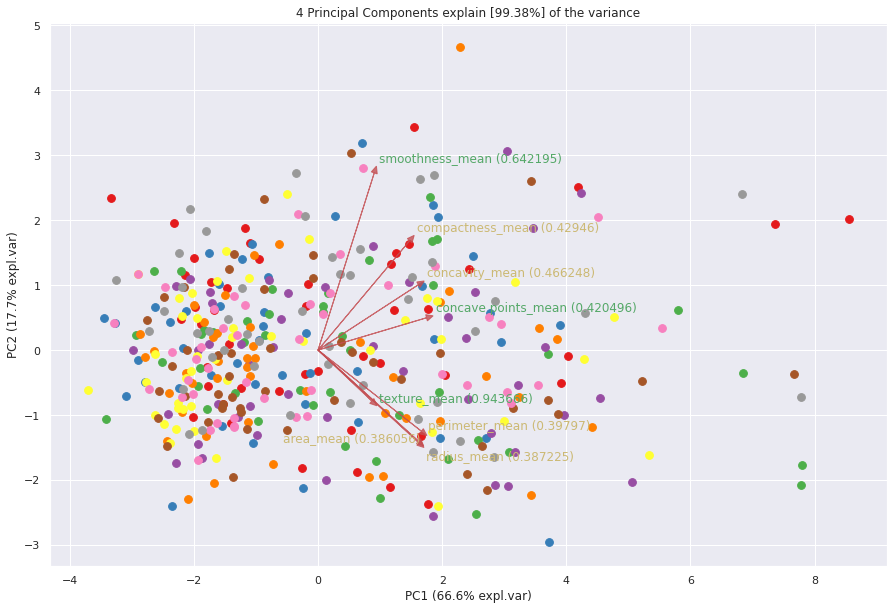

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f032bdea5b0>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [409] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [409] unique colors! Available unique colors: [9].


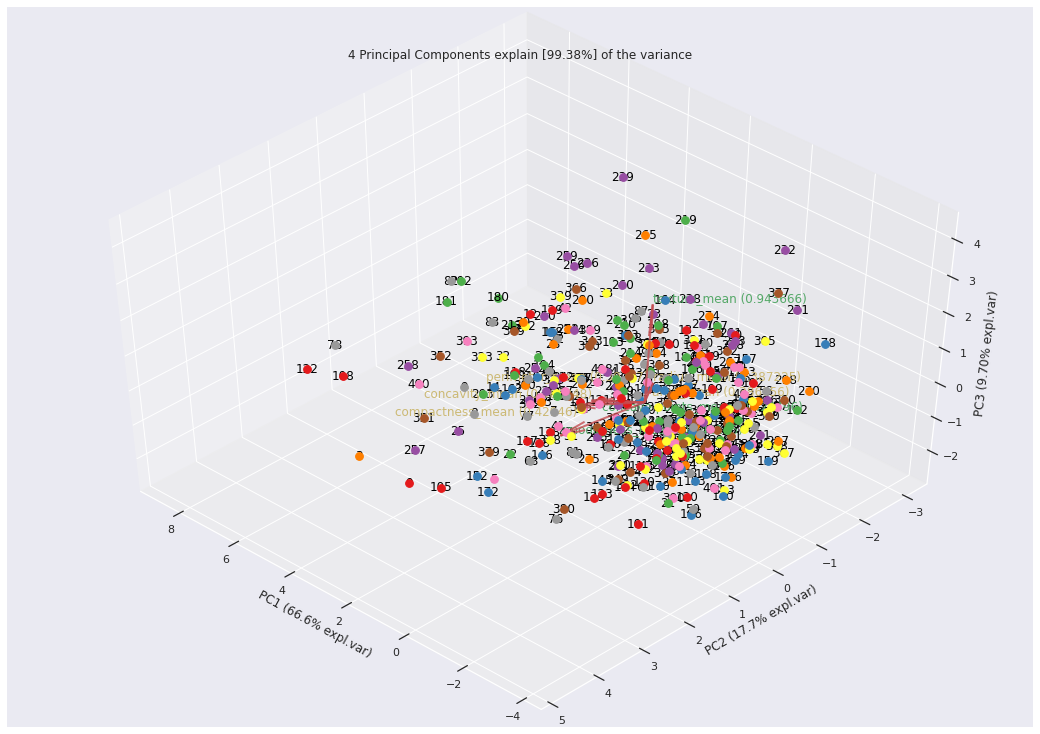

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f032df3aeb0>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 154 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 154 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (368, 9)
Unseen Data For Predictions: (41, 9)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='diagnosis', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (368, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (257, 7)
12                    Transformed Test Set          (111, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7d0a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='diagnosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (512, 9) means 512 samples and 9 features including the diagnosis column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 8 out of 9 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (512, 9) is transformed into (358, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 154 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
ada                  Ada Boost Classifier    0.9417  0.9833  0.9500  0.9437   
lightgbm  Light Gradient Boosting Machine    0.9338  0.9832  0.9357  0.9450   
lda          Linear Discriminant Analysis    0.9297  0.9803  0.9571  0.9201   
ridge                    Ridge Classifier    0.9262  0.0000  0.9500  0.9217   
rf               Random Forest Classifier    0.9262  0.9874  0.9143  0.9507   
qda       Quadratic Discriminant Analysis    0.9222  0.9815  0.9500  0.9113   
et                 Extra Trees Classifier    0.9222  0.9838  0.9286  0.9304   
gbc          Gradient Boosting Classifier    0.9178  0.9827  0.9143  0.9356   
nb                            Naive Bayes    0.9103  0.9792  0.9429  0.9033   
lr                    Logistic Regression    0.9063  0.9754  0.9137  0.9220   
dt               Decision Tree Classifier    0.9023  0.9027  0.9000  0.9210   
knn                K Neighbors Classifier    0.8872  0.9341  0.9071  0.8939   
svm                   SVM - Linear Kernel    0.7714  0.0000  0.7714  0.8410   
dummy                    Dummy Classifier    0.5409  0.5000  1.0000  0.5409   

              F1   Kappa     MCC  TT (Sec)  
ada       0.9463  0.8826  0.8840     0.101  
lightgbm  0.9385  0.8667  0.8706     0.112  
lda       0.9374  0.8570  0.8601     0.015  
ridge     0.9344  0.8500  0.8536     0.012  
rf        0.9303  0.8517  0.8559     0.211  
qda       0.9298  0.8424  0.8446     0.014  
et        0.9279  0.8430  0.8466     0.171  
gbc       0.9234  0.8350  0.8381     0.096  
nb        0.9202  0.8174  0.8249     0.016  
lr        0.9152  0.8101  0.8159     0.665  
dt        0.9083  0.8037  0.8079     0.019  
knn       0.8943  0.7729  0.7835     0.018  
svm       0.7467  0.5460  0.5971     0.015  
dummy     0.7020  0.0000  0.0000     0.014

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')
* Random Forest('rf')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8846  0.8929  0.7857  1.0000  0.8800  0.7719  0.7928
1       0.8846  0.8750  1.0000  0.8235  0.9032  0.7636  0.7859
2       0.8077  0.8095  0.7857  0.8462  0.8148  0.6154  0.6172
3       0.9231  0.9167  1.0000  0.8750  0.9333  0.8434  0.8539
4       0.8846  0.8869  0.8571  0.9231  0.8889  0.7692  0.7715
5       0.8077  0.8095  0.7857  0.8462  0.8148  0.6154  0.6172
6       0.9231  0.9226  0.9286  0.9286  0.9286  0.8452  0.8452
7       0.9600  0.9615  0.9231  1.0000  0.9600  0.9201  0.9231
8       0.7600  0.7565  0.7857  0.7857  0.7857  0.5130  0.5130
9       0.9200  0.9188  0.9286  0.9286  0.9286  0.8377  0.8377
Mean    0.8755  0.8750  0.8780  0.8957  0.8838  0.7495  0.7558
SD      0.0604  0.0604  0.0845  0.0688  0.0564  0.1216  0.1234

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9615  1.0000  0.9286  1.0000  0.9630  0.9231  0.9258
1       0.9231  0.9583  1.0000  0.8750  0.9333  0.8434  0.8539
2       0.8462  0.8929  0.7857  0.9167  0.8462  0.6941  0.7024
3       0.8846  0.9583  0.9286  0.8667  0.8966  0.7665  0.7688
4       0.9231  0.9613  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9615  0.9554  0.9286  1.0000  0.9630  0.9231  0.9258
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.7200  0.8052  0.7857  0.7333  0.7586  0.4262  0.4277
9       0.9600  0.9935  1.0000  0.9333  0.9655  0.9180  0.9211
Mean    0.9180  0.9525  0.9286  0.9254  0.9255  0.8340  0.8371
SD      0.0803  0.0582  0.0782  0.0808  0.0711  0.1639  0.1633

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9615  0.9851  0.9286  1.0000  0.9630  0.9231  0.9258
1       0.8846  0.9524  1.0000  0.8235  0.9032  0.7636  0.7859
2       0.8846  0.9464  0.8571  0.9231  0.8889  0.7692  0.7715
3       0.9231  0.9554  0.9286  0.9286  0.9286  0.8452  0.8452
4       0.9231  0.9196  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9231  0.9702  0.8571  1.0000  0.9231  0.8471  0.8571
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.8669  0.7857  0.8462  0.8148  0.5981  0.6000
9       0.8400  0.9578  0.9286  0.8125  0.8667  0.6689  0.6782
Mean    0.9140  0.9554  0.9214  0.9262  0.9217  0.8260  0.8309
SD      0.0612  0.0378  0.0674  0.0719  0.0547  0.1245  0.1223

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9231  0.9970  1.0000  0.8750  0.9333  0.8434  0.8539
2       0.8846  0.9375  0.8571  0.9231  0.8889  0.7692  0.7715
3       0.9231  0.9851  0.9286  0.9286  0.9286  0.8452  0.8452
4       0.9231  0.9881  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9231  0.9821  0.9286  0.9286  0.9286  0.8452  0.8452
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8400  0.9286  0.8571  0.8571  0.8571  0.6753  0.6753
9       0.9600  0.9805  1.0000  0.9333  0.9655  0.9180  0.9211
Mean    0.9377  0.9799  0.9500  0.9374  0.9431  0.8742  0.8758
SD      0.0504  0.0246  0.0558  0.0475  0.0461  0.1017  0.1013

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=33, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9231  0.9940  1.0000  0.8750  0.9333  0.8434  0.8539
2       0.9231  0.9643  0.9286  0.9286  0.9286  0.8452  0.8452
3       0.9231  0.9643  0.9286  0.9286  0.9286  0.8452  0.8452
4       0.9231  0.9821  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9231  0.9881  0.9286  0.9286  0.9286  0.8452  0.8452
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.7600  0.9351  0.7143  0.8333  0.7692  0.5223  0.5290
9       0.9600  0.9870  1.0000  0.9333  0.9655  0.9180  0.9211
Mean    0.9335  0.9815  0.9429  0.9356  0.9382  0.8665  0.8685
SD      0.0668  0.0200  0.0833  0.0517  0.0641  0.1330  0.1312

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9231  0.9940  1.0000  0.8750  0.9333  0.8434  0.8539
2       0.8846  0.9643  0.8571  0.9231  0.8889  0.7692  0.7715
3       0.9231  0.9643  0.9286  0.9286  0.9286  0.8452  0.8452
4       0.9231  0.9881  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9615  0.9881  0.9286  1.0000  0.9630  0.9231  0.9258
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.7600  0.9351  0.7143  0.8333  0.7692  0.5223  0.5290
9       0.9600  0.9870  1.0000  0.9333  0.9655  0.9180  0.9211
Mean    0.9335  0.9821  0.9357  0.9422  0.9377  0.8666  0.8692
SD      0.0690  0.0201  0.0872  0.0553  0.0663  0.1374  0.1356

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9615  0.9881  0.9286  1.0000  0.9630  0.9231  0.9258
1       0.9615  0.9821  1.0000  0.9333  0.9655  0.9222  0.9250
2       0.8846  0.9107  0.7857  1.0000  0.8800  0.7719  0.7928
3       0.9231  0.9821  0.9286  0.9286  0.9286  0.8452  0.8452
4       0.9231  0.9702  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9231  0.9613  0.8571  1.0000  0.9231  0.8471  0.8571
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.7600  0.8929  0.7857  0.7857  0.7857  0.5130  0.5130
9       0.9200  0.9838  0.9286  0.9286  0.9286  0.8377  0.8377
Mean    0.9257  0.9671  0.9143  0.9505  0.9303  0.8505  0.8542
SD      0.0654  0.0347  0.0769  0.0641  0.0596  0.1324  0.1316

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 13
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9615  1.0000  0.9286  1.0000  0.9630  0.9231  0.9258
1       0.9615  0.9881  1.0000  0.9333  0.9655  0.9222  0.9250
2       0.9231  0.9583  0.8571  1.0000  0.9231  0.8471  0.8571
3       0.9615  0.9345  0.9286  1.0000  0.9630  0.9231  0.9258
4       0.9615  0.9702  1.0000  0.9333  0.9655  0.9222  0.9250
5       0.8846  0.9583  0.8571  0.9231  0.8889  0.7692  0.7715
6       0.9615  1.0000  1.0000  0.9333  0.9655  0.9222  0.9250
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.8831  0.7857  0.8462  0.8148  0.5981  0.6000
9       0.9600  0.9935  1.0000  0.9333  0.9655  0.9180  0.9211
Mean    0.9375  0.9686  0.9357  0.9503  0.9415  0.8745  0.8776
SD      0.0540  0.0356  0.0746  0.0476  0.0508  0.1084  0.1082

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9615  1.0000  0.9286  1.0000  0.9630  0.9231  0.9258
1       0.9615  0.9762  1.0000  0.9333  0.9655  0.9222  0.9250
2       0.9231  0.9286  0.8571  1.0000  0.9231  0.8471  0.8571
3       0.9231  0.9643  0.9286  0.9286  0.9286  0.8452  0.8452
4       0.9231  0.9911  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9231  0.9851  0.9286  0.9286  0.9286  0.8452  0.8452
6       0.9615  1.0000  1.0000  0.9333  0.9655  0.9222  0.9250
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8400  0.9351  0.8571  0.8571  0.8571  0.6753  0.6753
9       0.9600  0.9935  1.0000  0.9333  0.9655  0.9180  0.9211
Mean    0.9377  0.9774  0.9429  0.9443  0.9425  0.8744  0.8765
SD      0.0406  0.0253  0.0535  0.0424  0.0368  0.0822  0.0826

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.4,
                   n_estimators=60, random_state=123)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.4,
                   n_estimators=60, random_state=123)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.4,
                   n_estimators=60, random_state=123), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='diagnosis', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (368, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (257, 3)
12                    Transformed Test Set          (111, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f079
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='diagnosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('dummy', Dummify(target='diagnosis')),
                ('fix_perfect', Remove_100(target='diagnosis')),
                ('clean_names', Clean_Colum_Names()),

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.9335  0.9815  0.9429  0.9356   
et                 Extra Trees Classifier    0.9297  0.9758  0.9214  0.9501   
qda       Quadratic Discriminant Analysis    0.9258  0.9789  0.9500  0.9181   
rf               Random Forest Classifier    0.9257  0.9671  0.9143  0.9505   
ridge                    Ridge Classifier    0.9180  0.0000  0.9714  0.8917   
lda          Linear Discriminant Analysis    0.9180  0.9815  0.9714  0.8917   
svm                   SVM - Linear Kernel    0.9145  0.0000  0.9286  0.9161   
knn                K Neighbors Classifier    0.9140  0.9554  0.9214  0.9262   
nb                            Naive Bayes    0.9140  0.9733  0.9214  0.9226   
lightgbm  Light Gradient Boosting Machine    0.9065  0.9759  0.9143  0.9179   
ada                  Ada Boost Classifier    0.9025  0.9655  0.9143  0.9102   
gbc          Gradient Boosting Classifier    0.9025  0.9743  0.9000  0.9260   
dt               Decision Tree Classifier    0.8755  0.8750  0.8780  0.8957   
dummy                    Dummy Classifier    0.5409  0.5000  1.0000  0.5409   

              F1   Kappa     MCC  TT (Sec)  
lr        0.9382  0.8665  0.8685     0.016  
et        0.9343  0.8587  0.8617     0.186  
qda       0.9327  0.8501  0.8536     0.016  
rf        0.9303  0.8505  0.8542     0.217  
ridge     0.9289  0.8325  0.8395     0.012  
lda       0.9289  0.8325  0.8395     0.012  
svm       0.9206  0.8275  0.8304     0.015  
knn       0.9217  0.8260  0.8309     0.023  
nb        0.9199  0.8269  0.8318     0.014  
lightgbm  0.9135  0.8113  0.8169     0.034  
ada       0.9109  0.8029  0.8061     0.094  
gbc       0.9093  0.8032  0.8097     0.079  
dt        0.8838  0.7495  0.7558     0.014  
dummy     0.7020  0.0000  0.0000     0.013

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9231  0.9940  1.0000  0.8750  0.9333  0.8434  0.8539
2       0.8846  0.9643  0.8571  0.9231  0.8889  0.7692  0.7715
3       0.9231  0.9643  0.9286  0.9286  0.9286  0.8452  0.8452
4       0.9231  0.9881  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9615  0.9881  0.9286  1.0000  0.9630  0.9231  0.9258
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.7600  0.9351  0.7143  0.8333  0.7692  0.5223  0.5290
9       0.9600  0.9870  1.0000  0.9333  0.9655  0.9180  0.9211
Mean    0.9335  0.9821  0.9357  0.9422  0.9377  0.8666  0.8692
SD      0.0690  0.0201  0.0872  0.0553  0.0663  0.1374  0.1356

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9615  0.9881  0.9286  1.0000  0.9630  0.9231  0.9258
1       0.9615  0.9821  1.0000  0.9333  0.9655  0.9222  0.9250
2       0.8846  0.9107  0.7857  1.0000  0.8800  0.7719  0.7928
3       0.9231  0.9821  0.9286  0.9286  0.9286  0.8452  0.8452
4       0.9231  0.9702  0.9286  0.9286  0.9286  0.8452  0.8452
5       0.9231  0.9613  0.8571  1.0000  0.9231  0.8471  0.8571
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.7600  0.8929  0.7857  0.7857  0.7857  0.5130  0.5130
9       0.9200  0.9838  0.9286  0.9286  0.9286  0.8377  0.8377
Mean    0.9257  0.9671  0.9143  0.9505  0.9303  0.8505  0.8542
SD      0.0654  0.0347  0.0769  0.0641  0.0596  0.1324  0.1316

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9615  1.0000  0.9286  1.0000  0.9630  0.9231  0.9258
1       0.9615  0.9881  1.0000  0.9333  0.9655  0.9222  0.9250
2       0.9231  0.9583  0.8571  1.0000  0.9231  0.8471  0.8571
3       0.9615  0.9345  0.9286  1.0000  0.9630  0.9231  0.9258
4       0.9615  0.9702  1.0000  0.9333  0.9655  0.9222  0.9250
5       0.8846  0.9583  0.8571  0.9231  0.8889  0.7692  0.7715
6       0.9615  1.0000  1.0000  0.9333  0.9655  0.9222  0.9250
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8000  0.8831  0.7857  0.8462  0.8148  0.5981  0.6000
9       0.9600  0.9935  1.0000  0.9333  0.9655  0.9180  0.9211
Mean    0.9375  0.9686  0.9357  0.9503  0.9415  0.8745  0.8776
SD      0.0540  0.0356  0.0746  0.0476  0.0508  0.1084  0.1082

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


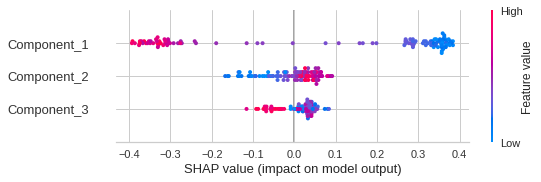

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
